In [2]:
import ROOT
from matplotlib import pyplot as plt
import pandas as pd

Welcome to JupyROOT 6.28/04


In [37]:
file_name = "rechit_histograms_20231031.root"
my_file = ROOT.TFile.Open(file_name)

my_file.goodTracks.iphi.ls()

TDirectoryFile*		iphi	iphi
 KEY: TH1D	iphi_0_1;1	iphi_0_1
 KEY: TH1D	iphi_0_2;1	iphi_0_2
 KEY: TH1D	iphi_0_4;1	iphi_0_4
 KEY: TH1D	iphi_0_5;1	iphi_0_5
 KEY: TH1D	iphi_0_7;1	iphi_0_7
 KEY: TH1D	iphi_0_8;1	iphi_0_8
 KEY: TH1D	iphi_1_2;1	iphi_1_2
 KEY: TH1D	iphi_1_3;1	iphi_1_3
 KEY: TH1D	iphi_1_4;1	iphi_1_4
 KEY: TH1D	iphi_1_7;1	iphi_1_7
 KEY: TH1D	iphi_1_10;1	iphi_1_10
 KEY: TH1D	iphi_2_3;1	iphi_2_3
 KEY: TH1D	iphi_2_4;1	iphi_2_4
 KEY: TH1D	iphi_2_7;1	iphi_2_7
 KEY: TH1D	iphi_2_10;1	iphi_2_10
 KEY: TH1D	iphi_2_11;1	iphi_2_11
 KEY: TH1D	iphi_3_10;1	iphi_3_10
 KEY: TH1D	iphi_3_11;1	iphi_3_11
 KEY: TH1D	iphi_4_5;1	iphi_4_5
 KEY: TH1D	iphi_4_6;1	iphi_4_6
 KEY: TH1D	iphi_4_10;1	iphi_4_10
 KEY: TH1D	iphi_4_11;1	iphi_4_11
 KEY: TH1D	iphi_5_6;1	iphi_5_6
 KEY: TH1D	iphi_5_10;1	iphi_5_10
 KEY: TH1D	iphi_5_11;1	iphi_5_11
 KEY: TH1D	iphi_6_10;1	iphi_6_10
 KEY: TH1D	iphi_6_11;1	iphi_6_11
 KEY: TH1D	iphi_7_8;1	iphi_7_8
 KEY: TH1D	iphi_7_9;1	iphi_7_9
 KEY: TH1D	iphi_7_10;1	iphi_7_10
 KEY: TH1D	iphi_7_1

In [40]:
file_name = "rechit_histograms_20231031.root"
my_file = ROOT.TFile.Open(file_name)

#open file and read in histograms
#my_file.ls()
histograms = {}
for key in my_file.goodTracks.rc.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
for key in my_file.goodTracks.theta.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
for key in my_file.goodTracks.dca.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
for key in my_file.goodTracks.dcaRc.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
for key in my_file.goodTracks.curvature.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist


In [41]:
# loop over all histograms and retrieve mean and std dev

def parse_hist_name(hist_name):
    l1 = l2 = l3 = -1
    cut = "minus one"
    if len(hist_name.split("_")) > 1:
        (cut, l1, l2, l3) = hist_name.split("_")
    return (cut, int(l1), int(l2), int(l3)) 

df = pd.DataFrame(columns=["cut", "entries", "mean", "std dev", "triplet ID", "layer 1", "layer 2", "layer 3", "label"])
cuts = ["dca", "theta", "rc", "dcaRc", "curvature"]
for hist_name in histograms:
    (cut, layer1, layer2, layer3) = parse_hist_name(hist_name)
    mean = histograms[hist_name].GetMean()
    stddev = histograms[hist_name].GetStdDev()
    entries = histograms[hist_name].GetEntries()

    if cut != "minus one":
        df_tmp = pd.DataFrame({"cut": cut, 
                               "entries": entries, 
                               "mean": mean, 
                               "std dev":stddev, 
                               "triplet ID":-1, 
                               "layer 1": layer1,
                               "layer 2": layer2,
                               "layer 3": layer3,
                               "label": str(layer1) + "_" + str(layer2) + "_" + str(layer3)}, index=[0])
        df = pd.concat([df, df_tmp], ignore_index=True)
df.set_index("label",drop=True,inplace=True)
df    

/var/folders/0m/wpyd3rf50ndd6p3t8qxnqkjm0000gn/T/ipykernel_44051/394293821.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_tmp], ignore_index=True)


,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
label,,,,,,,,
0_1_2,rc,19221.0,255.174726,263.511440,-1,0,1,2
0_1_3,rc,15559.0,271.096525,274.220110,-1,0,1,3
0_1_4,rc,5322.0,212.425225,233.559043,-1,0,1,4
0_1_7,rc,5766.0,207.587361,240.682308,-1,0,1,7
0_1_10,rc,21849.0,270.935909,267.328537,-1,0,1,10
...,...,...,...,...,...,...,...,...
7_10_11,curvature,696.0,0.019713,0.024423,-1,7,10,11
8_9_10,curvature,243.0,0.068114,0.042490,-1,8,9,10
8_9_11,curvature,149.0,0.046040,0.018549,-1,8,9,11


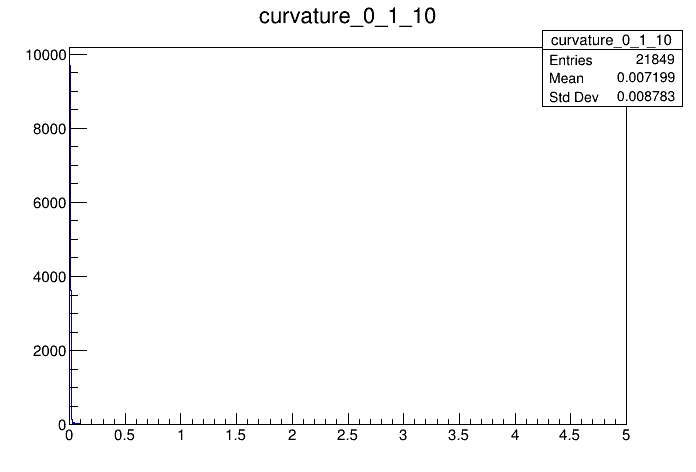

In [35]:
c = ROOT.TCanvas()
histograms["curvature_0_1_10"].Draw()
c.Draw()